#  Setup and Load Data

##  Import Dependencies and Setup

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os

In [1]:
# https://drive.google.com/drive/folders/1Epj874ZkixwajJn4ixH6gVcmr-eHYqSf?usp=drive_link  data we used

##  Remove  images with certain extensions (to get the images that has certain extensions)

In [ ]:
import imghdr #  allows us to check the file extensions for particular images

In [ ]:
data_dir = 'DATA/data'

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not exist in ext list{}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Issue with image DATA/data/happy/.ipynb_checkpoints


##  Load Data

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('DATA/data') # Builds an image data set for us according to the directory

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator() # allows us to access the generator from our data pipeline

In [ ]:
batch = data_iterator.next() # access the data pipeline itself

In [ ]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

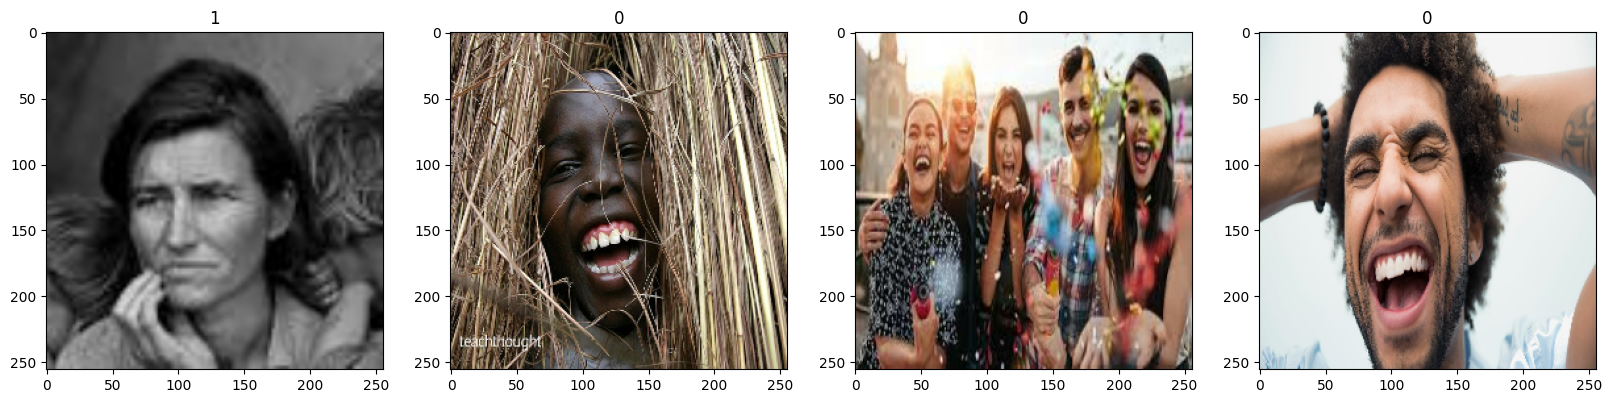

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 1 = sad people

Class 0 = happy people

#  Preprocess Data

###  Scale Data

In [ ]:
data = data.map(lambda x,y : (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator().next() # values are scaled between 0 and 1

## Split Data

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

## Train

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
7/7 [==============================] - 22s 3s/step - loss: 1.1162 - accuracy: 0.5134 - val_loss: 0.6596 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6759 - accuracy: 0.5134 - val_loss: 0.6206 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 0.6208 - accuracy: 0.7143 - val_loss: 0.5479 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 20s 3s/step - loss: 0.5468 - accuracy: 0.7143 - val_loss: 0.6647 - val_accuracy: 0.6562
Epoch 5/20
7/7 [==============================] - 20s 3s/step - loss: 0.5906 - accuracy: 0.7009 - val_loss: 0.4466 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 21s 3s/step - loss: 0.4916 - accuracy: 0.7902 - val_loss: 0.4318 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.3976 - accuracy: 0.8482 - val_loss: 0.2541 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

## Plot Performance


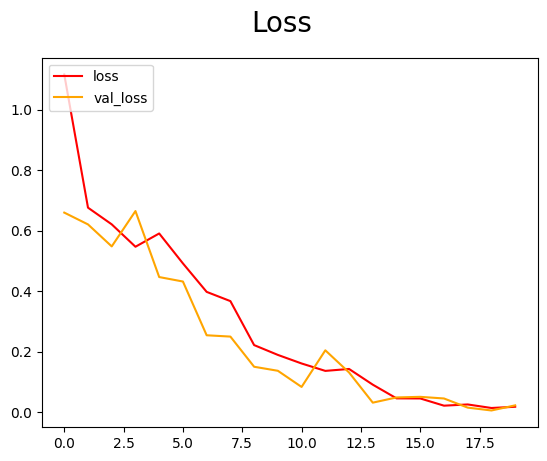

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc="upper left")
plt.show()

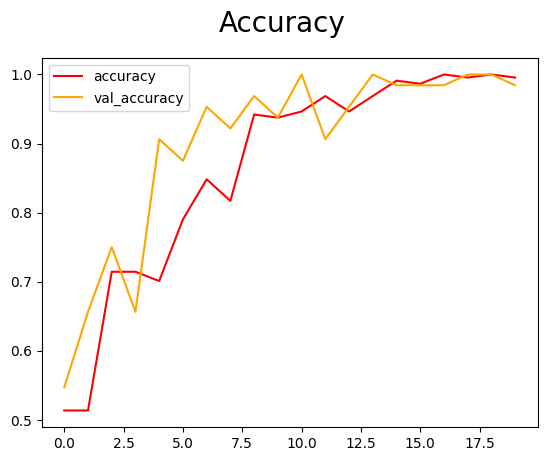

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

## Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X) # model making predictions on test data
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 337ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Accuracy:1.0
